# Task - 1 Iris Flower Classification using ML Project

#### Rohit Loharkar @ LetsGrowMore Intern April22

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Link for the dataset: http://archive.ics.uci.edu/ml/datasets/Iris

In [2]:
data1 = pd.read_csv('iris.csv')

In [3]:
data = data1.drop('Id', axis=1)

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


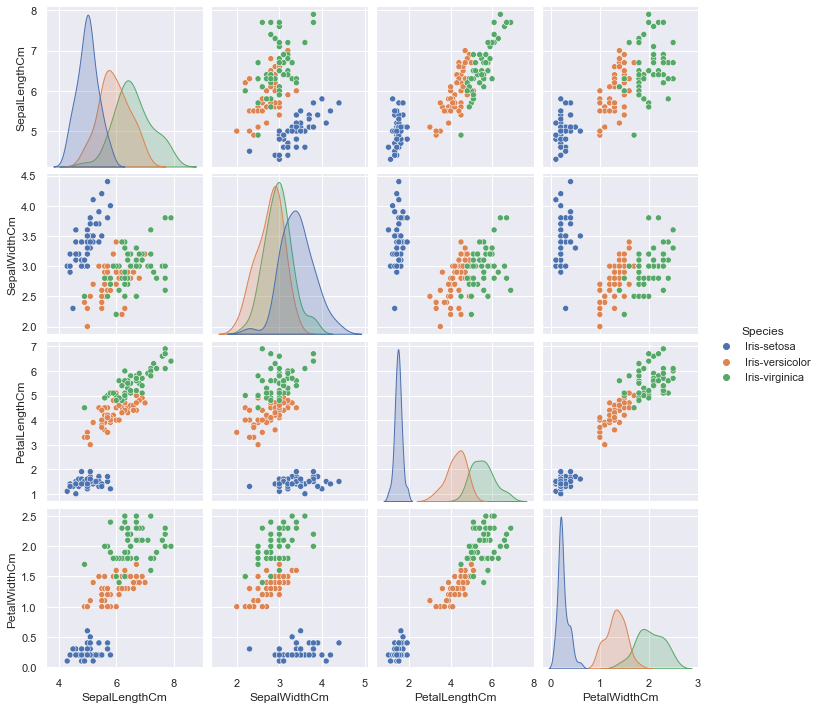

In [9]:
sns.pairplot(data, hue = 'Species')

In [10]:
SPECIES = {}
SPECIES["Setosa"] = (data['Species'] == 'Iris-setosa').sum()
SPECIES["Versicolor"] = (data['Species'] == 'Iris-versicolor').sum()
SPECIES['Virginia'] = (data['Species'] == 'Iris-virginica').sum()

print(SPECIES)

{'Setosa': 50, 'Versicolor': 50, 'Virginia': 50}


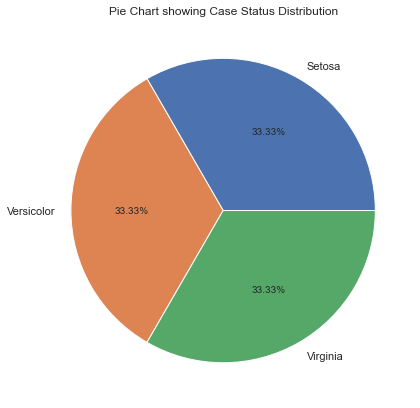

In [11]:
labels = []
count = []
for x,y in SPECIES.items():
    labels.append(x)
    count.append(y)
plt.figure(figsize = (7,7))
plt.pie(count, labels = labels, autopct="%1.2f%%")
plt.title('Pie Chart showing Case Status Distribution')
plt.show()

In [12]:
X = data.drop('Species', axis=1)
Y = data['Species']

In [13]:
X.shape

(150, 4)

In [14]:
Y.shape

(150,)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 105 )

In [16]:
Y_train.value_counts()

Iris-setosa        42
Iris-versicolor    41
Iris-virginica     37
Name: Species, dtype: int64

In [17]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

In [18]:
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy*100,'%')

96.66666666666667 %


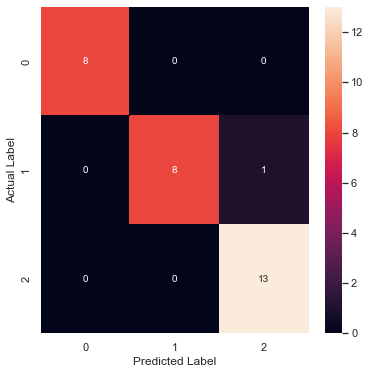

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]], dtype=int64)

In [19]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
CM

In [20]:
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

